<a href="https://colab.research.google.com/github/palash04/Artificial-Intelligence/blob/master/NN_with_Keras/_02_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews. Positive(1) or negative(0)?

In [1]:
import keras
keras.__version__

'2.4.3'

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data.shape

(25000,)

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
# Preparing data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
print (f'Train Data Shape: {train_data.shape}')
print (f'Prepared Train Data Shape: {x_train.shape}')

Train Data Shape: (25000,)
Prepared Train Data Shape: (25000, 10000)


In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
print (len(train_labels))

25000


In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [22]:
print (y_train[0])

1.0


In [41]:
# Creating Network Architecture
from keras import layers,models,losses,metrics,optimizers

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [51]:
# Validating our approach
x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:]

In [52]:
# Train the network
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs = 20, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 41ms/step - loss: 0.5263 - binary_accuracy: 0.7755 - val_loss: 0.3936 - val_binary_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3116 - binary_accuracy: 0.9011 - val_loss: 0.3132 - val_binary_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2265 - binary_accuracy: 0.9251 - val_loss: 0.2774 - val_binary_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1752 - binary_accuracy: 0.9422 - val_loss: 0.2837 - val_binary_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1411 - binary_accuracy: 0.9543 - val_loss: 0.2866 - val_binary_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1155 - binary_accuracy: 0.9651 - val_loss: 0.2943 - val_binary_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

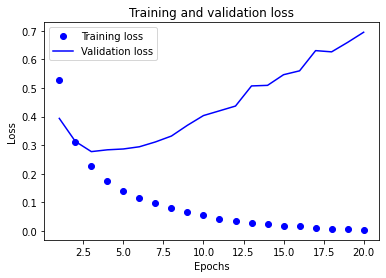

In [54]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

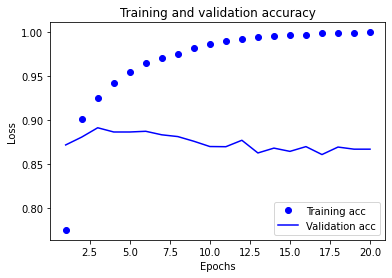

In [55]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.7678 - binary_accuracy: 0.8496


In [57]:
results     # this is due to we trained for 20 epochs, and the model did overfitting

[0.767835795879364, 0.8496400117874146]

In [58]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4770 - accuracy: 0.8217
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2744 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2072 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2866 - accuracy: 0.8870


In [59]:
results     # this is due to we trained for 4 epochs, and the stopped the model from overfitting

[0.2865535318851471, 0.8869600296020508]

In [60]:
model.predict(x_test)

array([[0.23973498],
       [0.9992757 ],
       [0.8481422 ],
       ...,
       [0.14950195],
       [0.08311597],
       [0.6149788 ]], dtype=float32)

## Conclusion

Here's what you should take away from this example:

- There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
- Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you will likely use them frequently.
- In a binary classification problem (two output classes), your network should end with a Dense layer with 1 unit and a sigmoid activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is binary_crossentropy.
- The rmsprop optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.